<a href="https://colab.research.google.com/github/AdamPoi/PCVK/blob/main/PCVK_week07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCVK week07 - Filter Spasia

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:
a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
import glob

In [3]:
def convolution2d(image, kernel, stride=1, padding=0):
    height, width=image.shape
    k_height,k_width=kernel.shape
    padding_height = height + 2 * padding
    padding_width = width + 2 * padding

    padded_image = np.zeros((padding_height, padding_width))
    padded_image[padding:-padding, padding:-padding] = image

    out_height = (height - k_height + 2 * padding) // stride + 1
    out_width = (width - k_width + 2 * padding) // stride + 1

    output = np.zeros((out_height, out_width))

    for y in range(0, out_height):
        for x in range(0, out_width):

            y_start = y * stride
            y_end = y_start + kernel.shape[0]
            x_start = x * stride
            x_end = x_start + kernel.shape[1]
            pixel_value = np.sum(kernel * padded_image[y_start:y_end, x_start:x_end])

            output[y, x] = pixel_value

    return output

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


**gray**

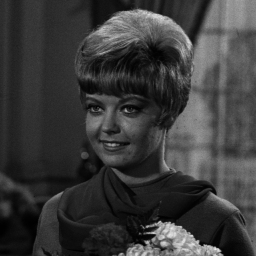

In [5]:
cv2_imshow(img_gray)

**sharpen**

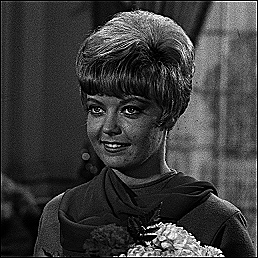

In [6]:
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpen_img= convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(sharpen_img)

**emboss**

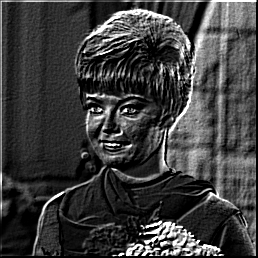

In [7]:
kernel_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
emboss_img= convolution2d(img_gray,kernel_emboss,1,2)
cv2_imshow(emboss_img)

**Left Sobel Edge Detection**

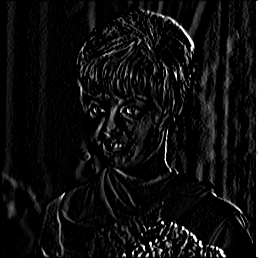

In [8]:
kernel_left_sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
left_sobel_img= convolution2d(img_gray,kernel_left_sobel,1,2)
cv2_imshow(left_sobel_img)

**Canny Edge Detection**

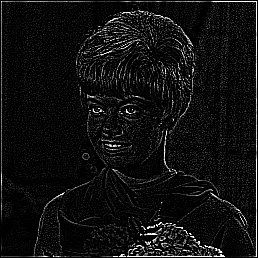

In [9]:
kernel_canny_edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
canny_edge_img= convolution2d(img_gray,kernel_canny_edge,1,2)
cv2_imshow(canny_edge_img)

**Prewitt Edge Detection**

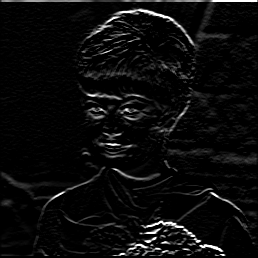

In [10]:
kernel_prewitt_edge = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
prewitt_edge_img= convolution2d(img_gray,kernel_prewitt_edge,1,2)
cv2_imshow(prewitt_edge_img)

**5x5 Gaussian Blur**

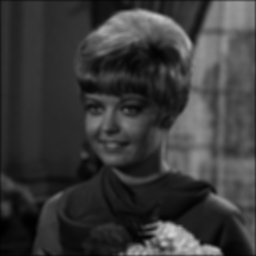

In [11]:
kernel_size = 5
sigma=math.sqrt(kernel_size)
gaussian_kernel =cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss = gaussian_kernel @ gaussian_kernel.transpose()
gauss_img= convolution2d(img_gray,kernel_gauss,1,2)
cv2_imshow(gauss_img)

**21x21 Gaussian Blur**

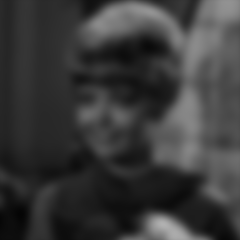

In [12]:
kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel =cv.getGaussianKernel(kernel_size, sigma)
kernel_gauss = gaussian_kernel @ gaussian_kernel.transpose()
gauss_img= convolution2d(img_gray,kernel_gauss,1,2)
cv2_imshow(gauss_img)

## Tugas

In [13]:
ktp_images = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/ktp_more/ktp*'):
   n = cv.imread(img)
   n = cv.resize(n,(700,350))
   ktp_images.append(n)

In [14]:
def convolution2d_rgb(image, kernel,stride,padding):
  channels = cv.split(image)
  conv_channels = []
  for ch, color in zip(channels, ["r", "g", "b"]):
    conv_channels.append(convolution2d(ch,kernel,stride,padding))
  conv_image = cv.merge(conv_channels)
  return conv_image

In [15]:
def brightness_filter(image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

In [16]:
def equalize_filter (image):
  channels = cv.split(image)
  eq_channels = []
  for ch, color in zip(channels, ["r", "g", "b"]):
    eq_channels.append(cv.equalizeHist(ch))
  eq_image = cv.merge(eq_channels)
  return eq_image

**KTP 1**

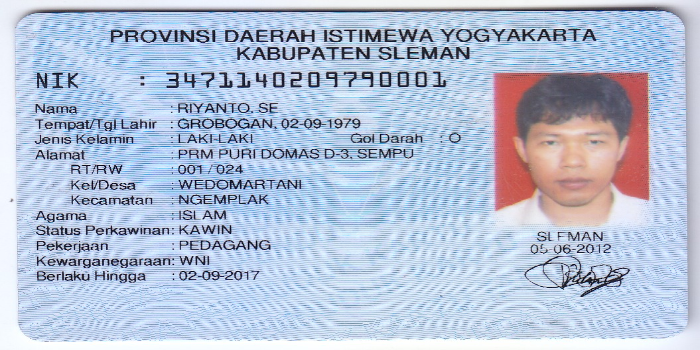

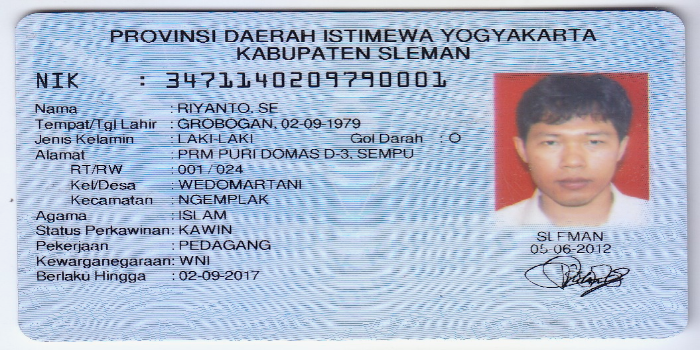

In [26]:
brightness_result = brightness_filter(ktp_images[0], -8)

cv2_imshow(ktp_images[0])
cv2_imshow(brightness_result)

**KTP 2**

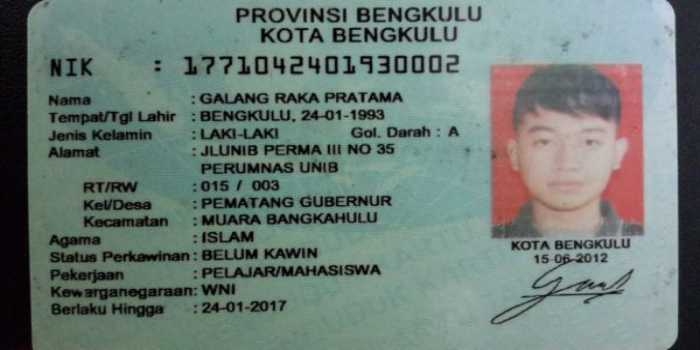

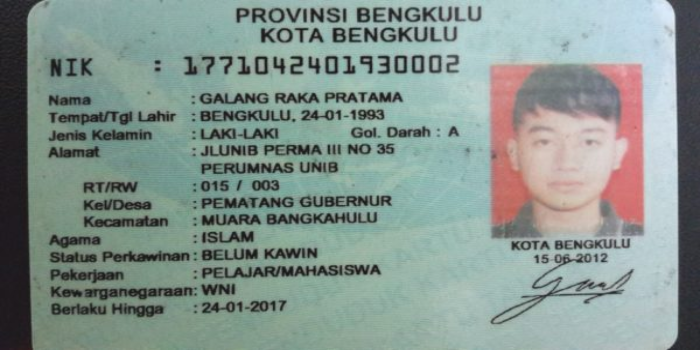

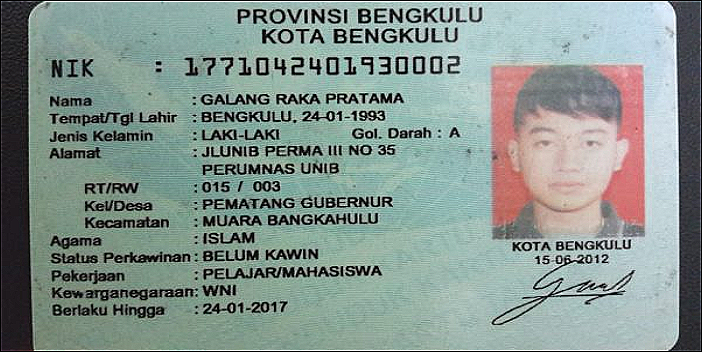

In [27]:
brightness_result = brightness_filter(ktp_images[1], 24)

sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpen_result = convolution2d_rgb(brightness_result, sharpen_kernel,1,2)

cv2_imshow(ktp_images[1])
cv2_imshow(brightness_result)
cv2_imshow(sharpen_result)


**KTP 3**

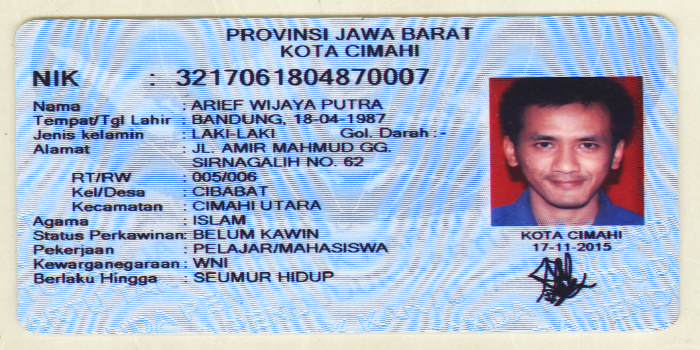

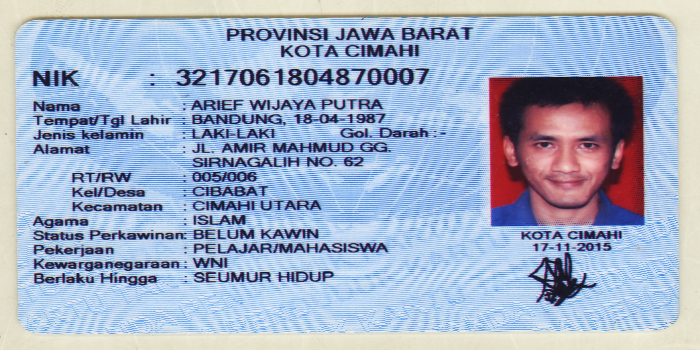

In [29]:
brightness_result = brightness_filter(ktp_images[2], -8)

cv2_imshow(ktp_images[2])
cv2_imshow(brightness_result)


**KTP 5**

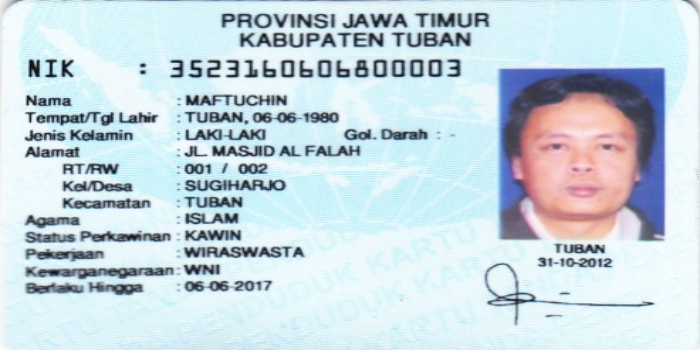

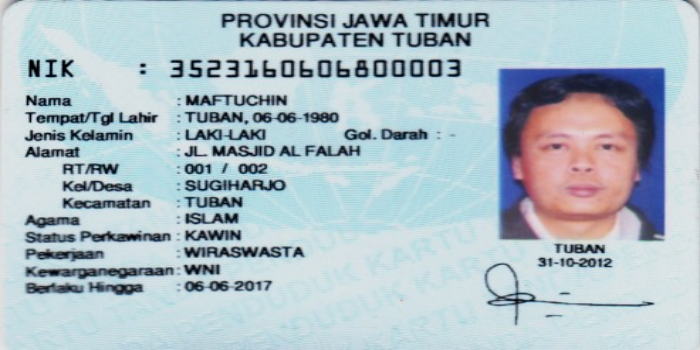

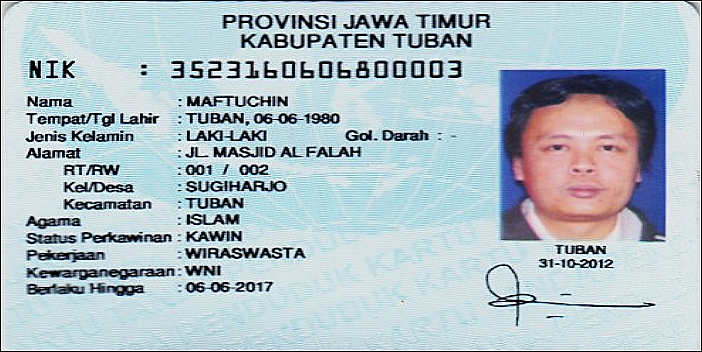

In [30]:
brightness_result = brightness_filter(ktp_images[3], -24)

sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpen_result = convolution2d_rgb(brightness_result, sharpen_kernel,1,2)

cv2_imshow(ktp_images[3])
cv2_imshow(brightness_result)
cv2_imshow(sharpen_result)


**KTP 5**

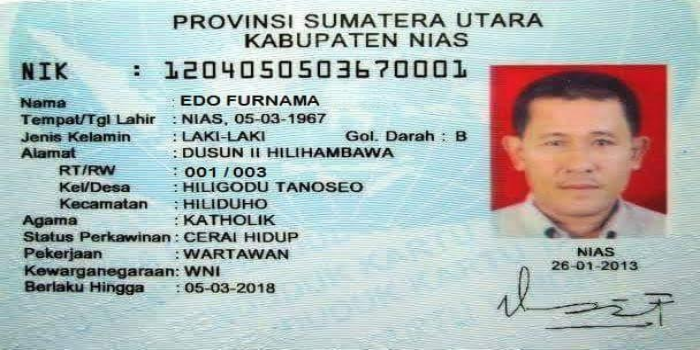

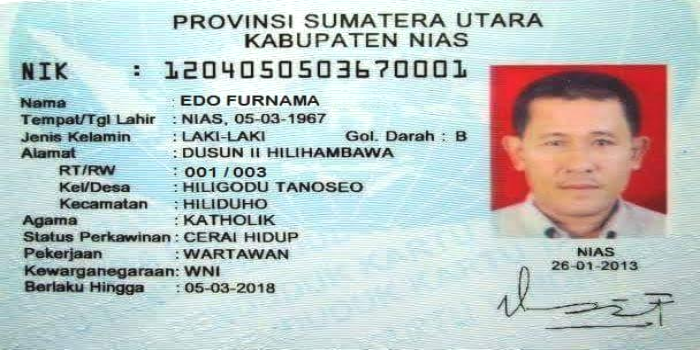

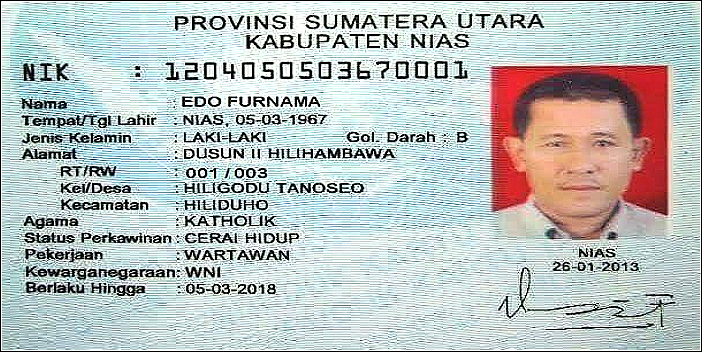

In [31]:
brightness_result = brightness_filter(ktp_images[5], 12)

sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpen_result = convolution2d_rgb(brightness_result, sharpen_kernel,1,2)

cv2_imshow(ktp_images[5])
cv2_imshow(brightness_result)
cv2_imshow(sharpen_result)


**KTP 6**

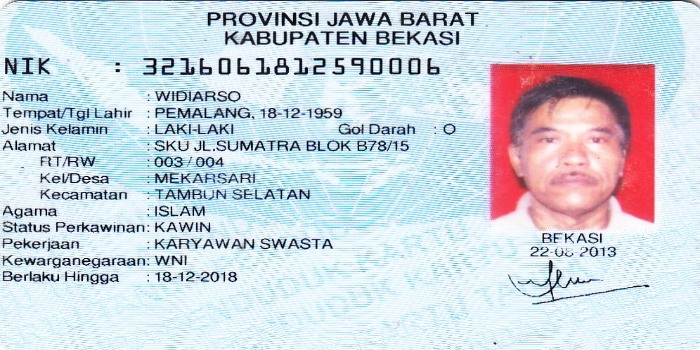

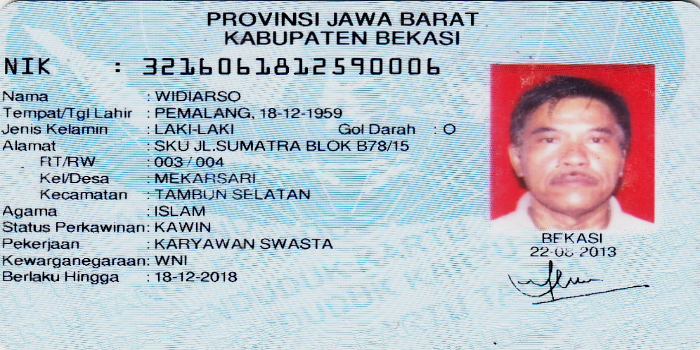

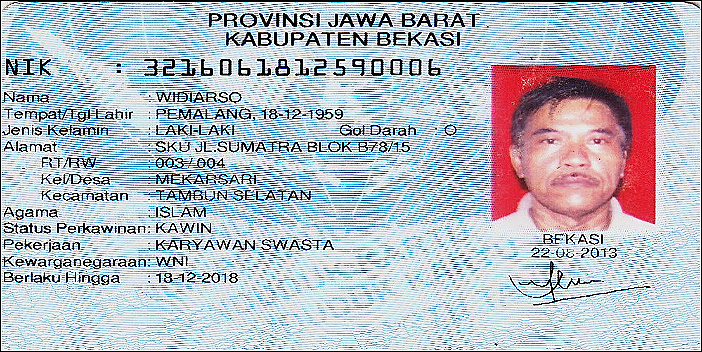

In [34]:
brightness_result = brightness_filter(ktp_images[6], -20)

sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpen_result = convolution2d_rgb(brightness_result, sharpen_kernel,1,2)

cv2_imshow(ktp_images[6])
cv2_imshow(brightness_result)
cv2_imshow(sharpen_result)
